<a href="https://colab.research.google.com/github/mai0elkady/Boston_airbnb_data_analysis/blob/main/Boston_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# to access the files I have
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [53]:
import numpy as np
import pandas as pd
import string 
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
boston_airbnb_data_path = '/content/drive/MyDrive/UdacityND/project1/Boston_Airbnb/'

In [4]:
calendar = pd.read_csv(boston_airbnb_data_path+'calendar.csv')
listings = pd.read_csv(boston_airbnb_data_path+'listings.csv')
reviews = pd.read_csv(boston_airbnb_data_path+'reviews.csv')

In [5]:
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [6]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [7]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,moderate,f,f,1

In [8]:
print(listings.columns)
#drop the coloumns below, either because they're not useful in our case, or will be correlated with other variables
smaller_listings = listings.drop(['zipcode','listing_url', 'scrape_id', 'last_scraped', 'name', 'summary','description', 'experiences_offered', 'neighborhood_overview',
       'notes','transit','access','interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name','host_location','host_picture_url', 'host_neighbourhood', 'host_verifications',
       'neighbourhood_group_cleansed', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact','calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'calendar_last_scraped','first_review', 'last_review', 
       'requires_license',
       'license', 'jurisdiction_names','calculated_host_listings_count','space', 'host_about','host_thumbnail_url','street'
       ,'weekly_price','monthly_price','cleaning_fee','square_feet','security_deposit','extra_people','city','state',
       'id','host_listings_count','neighbourhood_cleansed','reviews_per_month','review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location'],axis = 1)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [9]:
#drop rows with missing price
listings = listings.dropna(subset=['price'], axis=0)
#drop coloumns with more than 30% missing values
more_than_30 = listings.columns[listings.isnull().mean() > 0.3]
listings = listings.drop(more_than_30, axis=1)

In [10]:
pd.set_option('display.max_rows', None)
print("percent of missing values in each coloumn in listings")
display(smaller_listings.isnull().mean())
pd.set_option('display.max_rows', 10)

percent of missing values in each coloumn in listings


host_since                          0.000000
host_response_time                  0.131381
host_response_rate                  0.131381
host_acceptance_rate                0.131381
host_is_superhost                   0.000000
host_total_listings_count           0.000000
host_has_profile_pic                0.000000
host_identity_verified              0.000000
neighbourhood                       0.151464
property_type                       0.000837
room_type                           0.000000
accommodates                        0.000000
bathrooms                           0.003905
bedrooms                            0.002789
beds                                0.002510
bed_type                            0.000000
amenities                           0.000000
price                               0.000000
guests_included                     0.000000
minimum_nights                      0.000000
maximum_nights                      0.000000
number_of_reviews                   0.000000
review_sco

In [11]:
smaller_listings.dtypes

host_since                           object
host_response_time                   object
host_response_rate                   object
host_acceptance_rate                 object
host_is_superhost                    object
                                     ...   
review_scores_value                 float64
instant_bookable                     object
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
Length: 27, dtype: object

In [12]:
smaller_listings['price']

0       $250.00
1        $65.00
2        $65.00
3        $75.00
4        $79.00
         ...   
3580     $69.00
3581    $150.00
3582    $198.00
3583     $65.00
3584     $65.00
Name: price, Length: 3585, dtype: object

In [13]:
#we can remove the $ infront of the price and treat it as quatitative variable
#also remove the ,s in the price to convert it to float later
smaller_listings['price'] = smaller_listings['price'].map(lambda val: val.replace("$",'').replace(",",''), na_action = 'ignore')
smaller_listings = smaller_listings.astype({'price': 'float64'})

In [14]:
smaller_listings['price']

0       250.0
1        65.0
2        65.0
3        75.0
4        79.0
        ...  
3580     69.0
3581    150.0
3582    198.0
3583     65.0
3584     65.0
Name: price, Length: 3585, dtype: float64

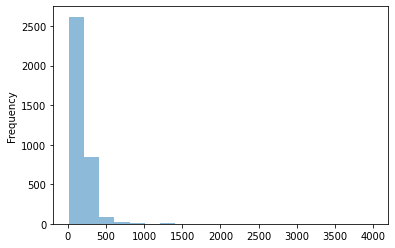

In [15]:
#histogram of price
ax = smaller_listings['price'].plot.hist(bins=20,alpha=0.5)

We notice that there are extreme outliers that are not frequent, so it's better to remover these


In [16]:
print(smaller_listings.describe().price)
#drop prices not between the 5-95% quantile
len_before = len(smaller_listings)
smaller_listings = smaller_listings[smaller_listings['price'].between(smaller_listings['price'].quantile(.05), smaller_listings['price'].quantile(.95))]
len_after = len(smaller_listings)
print(smaller_listings.describe().price)
print("we dropped "+str(len_before-len_after)+" rows")

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64
count    3232.000000
mean      159.166460
std        79.901999
min        50.000000
25%        90.000000
50%       150.000000
75%       208.000000
max       375.000000
Name: price, dtype: float64
we dropped 353 rows


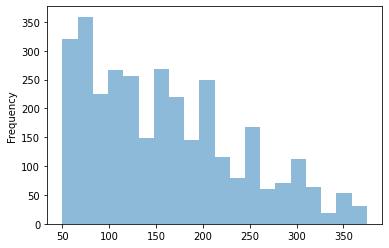

In [17]:
#histogram of price
ax = smaller_listings['price'].plot.hist(bins=20,alpha=0.5)

Separate Quantitiative and Catagorical variables

In [18]:
#separate listings features into categorical and quantitative
cat_df = smaller_listings.select_dtypes(include=['object'])
quant_df = smaller_listings.select_dtypes(include=['float64','int64'])

In [19]:
#also host_response_rate	and host_acceptance_rate have % after them
quant_df['host_response_rate'] = cat_df['host_response_rate'].apply(lambda val: val[0:-1] if isinstance(val, float)==False else np.nan)
quant_df = quant_df.astype({'host_response_rate': 'float64'})
cat_df = cat_df.drop(['host_response_rate'],axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:
#same for host acceptance rate
quant_df['host_acceptance_rate'] = cat_df['host_acceptance_rate'].apply(lambda val: val[0:-1] if isinstance(val, float)==False else np.nan)
quant_df = quant_df.astype({'host_acceptance_rate': 'float64'})
cat_df = cat_df.drop(['host_acceptance_rate'],axis = 1)

In [21]:
# for the host_since variable, I want to calculate the number of years instead of using a date 
# and change that to be a quantitative variable too
cat_df['host_since'] =  pd.to_datetime(cat_df['host_since'], format='%Y-%m-%d')
quant_df['host_since_days'] = cat_df['host_since'].apply(lambda val: (date(2021,1,7)-date(val.year,val.month,val.day)).days if val else NaN)
cat_df = cat_df.drop(['host_since'], axis = 1)

In [22]:
#some coloumns have t,f for true and false, and I want to change them to boolean
for col in cat_df:
    if(len(cat_df[col].unique())<=3):
      unique_vals = sorted(cat_df[col].unique())
      if unique_vals[0] == 'f':
        cat_df[col] = cat_df[col].apply(lambda val: True if val=='t' else False)


In [23]:
cat_df.columns

Index(['host_response_time', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood', 'property_type', 'room_type',
       'bed_type', 'amenities', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification'],
      dtype='object')

In [24]:
#change amenities to be amenties count instead
quant_df['amenities_count'] = cat_df.amenities.str.count(',')+1
cat_df = cat_df.drop('amenities', axis=1)

In [25]:
#reorganize the coloumns
quant_cols = quant_df.columns.tolist()
quant_cols = quant_cols[-5:] + quant_cols[:-5]
print(quant_cols)
quant_df = quant_df[quant_cols]

['review_scores_value', 'host_response_rate', 'host_acceptance_rate', 'host_since_days', 'amenities_count', 'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included', 'minimum_nights', 'maximum_nights', 'number_of_reviews']


Some EDA 

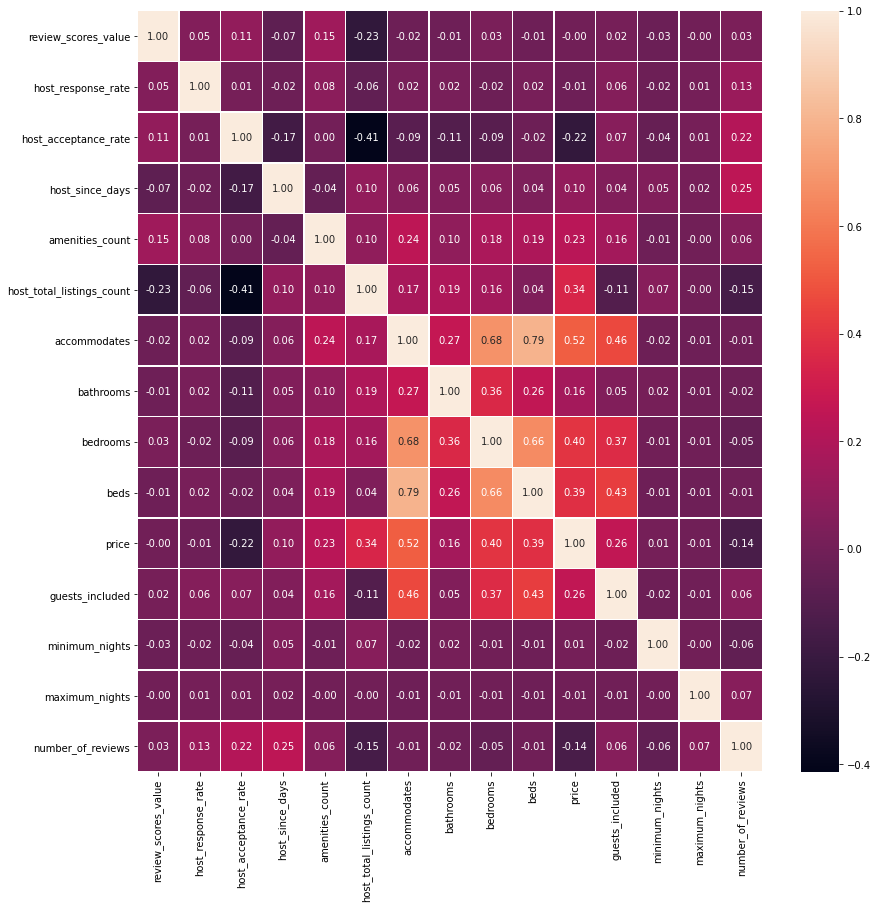

In [26]:
# with the quantitative variables plot a heat map to identify how are variable correlated
fig, ax = plt.subplots(figsize=(14,14))         # Sample figsize in inches
sns.heatmap(quant_df.corr(),annot=True,fmt=".2f",linewidths=.5, ax=ax)

We see some positive correlation between 'accommodates', 'bedrooms', 'beds' and price. Also, there is some positive correlation between 'amenities_count','host_total_listings_count','bathrooms', 'guests_included' and price.

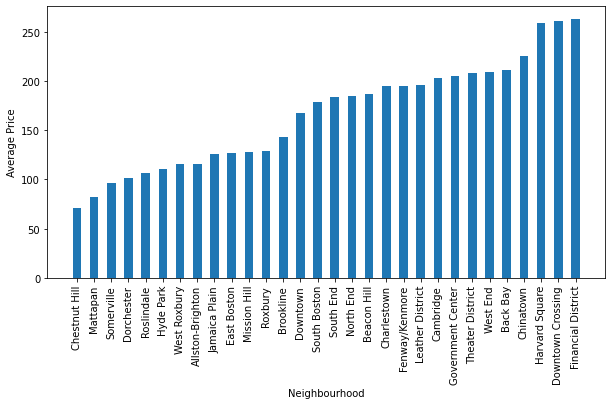

In [27]:
#average neighbourhood prices
neighbourhood_df = pd.DataFrame({'neighbourhood':cat_df['neighbourhood'],'price':quant_df['price']})
average_price_in_neighbourhood = neighbourhood_df.groupby('neighbourhood').mean().reset_index()
average_price_in_neighbourhood = average_price_in_neighbourhood.sort_values(by=['price'])
orderd_neighbourhoods = average_price_in_neighbourhood['neighbourhood'] #to be used in next cell
plt.figure(1,(10,5))
plt.bar(average_price_in_neighbourhood['neighbourhood'],average_price_in_neighbourhood['price'],width = 0.5);
plt.xlabel("Neighbourhood")
plt.ylabel("Average Price")
plt.xticks(rotation=90);


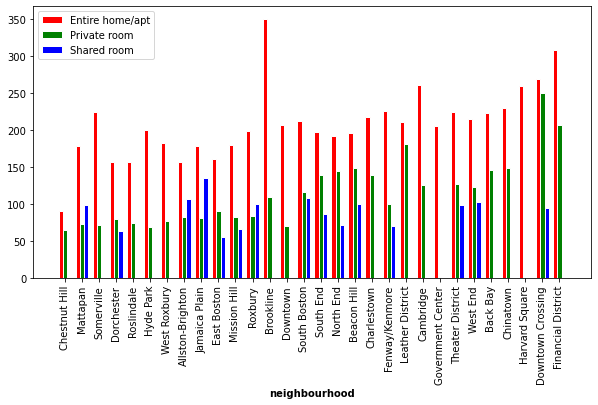

In [28]:
#Do they neighbourhood offer larger rooms, study between the relationship of room_type and neighbourhood
neighbourhood_roomtype_df = pd.DataFrame({'neighbourhood':cat_df['neighbourhood'],
                                          'room_type':cat_df['room_type'],'price':quant_df['price']})
neighbourhood_roomtype_df = neighbourhood_roomtype_df.sort_values(by=['price'])
average_price_neighbour_rmtype = neighbourhood_roomtype_df.groupby(['neighbourhood','room_type']).mean().reset_index()

# set width of bar
barWidth = 0.25
bars = []
labels = average_price_neighbour_rmtype['room_type'].unique()
# set height of bar
neighbourhoods = average_price_neighbour_rmtype['neighbourhood'].unique()
i_s = len(neighbourhoods)
j_s = len(labels)
bars = np.ones((j_s,i_s))
for i,neighbourhood in enumerate(orderd_neighbourhoods):
  subset = average_price_neighbour_rmtype[average_price_neighbour_rmtype['neighbourhood'] == neighbourhood]
  for j,rm_type in enumerate(average_price_neighbour_rmtype['room_type'].unique()):
    #print(list(subset['room_type']))
    if(rm_type in list(subset['room_type'])):
      bars[j][i] = subset[subset['room_type']==rm_type]['price']
    else:
      bars[j][i] = 0
    

# Set position of bar on X axis
rs = np.ones((len(labels),len(bars[0])))
rs[0,:] = np.arange(len(bars[0]))
plt.figure(3,(10,5))
for i in range(1,len(labels)):
  rs[i,:] = [x + barWidth for x in rs[i-1,:]]
colors = ['r','g','b']
for i in range(0,len(labels)):
  plt.bar(rs[i,:], bars[i], color=colors[i], width=barWidth, edgecolor='white', label=labels[i])

# Add xticks on the middle of the group bars
plt.xlabel('neighbourhood', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars[0]))],list(orderd_neighbourhoods))
 
# Create legend & Show graphic
plt.legend()
plt.xticks(rotation=90);
plt.show()

#if we were to arrange them by entire home/private room/ etc. we would get a different plot than before

In [29]:
cat_df.head()

,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood,property_type,room_type,bed_type,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,NaN,False,True,False,Roslindale,House,Entire home/apt,Real Bed,False,moderate,False,False
1,within an hour,False,True,True,Roslindale,Apartment,Private room,Real Bed,True,moderate,False,False
2,within a few hours,True,True,True,Roslindale,Apartment,Private room,Real Bed,False,moderate,True,False
3,within a few hours,False,True,False,NaN,House,Private room,Real Bed,False,moderate,False,False
4,within an hour,True,True,True,Roslindale,House,Private room,Real Bed,False,flexible,False,False


In [30]:
quant_df.head()

,review_scores_value,host_response_rate,host_acceptance_rate,host_since_days,amenities_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,maximum_nights,number_of_reviews
0,NaN,NaN,NaN,2094,15,1,4,1.5,2.0,3.0,250.0,1,2,1125,0
1,9.0,100.0,100.0,3136,21,1,2,1.0,1.0,1.0,65.0,0,2,15,36
2,10.0,100.0,88.0,4259,18,1,2,1.0,1.0,1.0,65.0,1,3,45,41
3,10.0,100.0,50.0,2818,23,1,4,1.0,1.0,2.0,75.0,2,1,1125,1
4,10.0,100.0,100.0,2433,14,1,2,1.5,1.0,2.0,79.0,1,2,31,29


In [31]:
#which part of the review affect your overall review the most!
#review, space, neighbourhood and price (how are they all related)
#new airbnb people, how much to charge for your room, based on space, neighbourhood and other factors

In [32]:
#checking whether I can change variables into onehot encoded depending on how many unique values are there
# in each coloumn
sum_total_unique_vals = 0
for col in cat_df:
  print(col)
  unique_col_vals = cat_df[col].unique()
  print(len(unique_col_vals))
  print(unique_col_vals)
  sum_total_unique_vals+=len(unique_col_vals)
print(sum_total_unique_vals)
#cat_df['host_response_time'].unique()
# a total of 74 unique value,


host_response_time
5
[nan 'within an hour' 'within a few hours' 'within a day'
 'a few days or more']
host_is_superhost
2
[False  True]
host_has_profile_pic
2
[ True False]
host_identity_verified
2
[False  True]
neighbourhood
31
['Roslindale' nan 'Jamaica Plain' 'Mission Hill' 'Fenway/Kenmore'
 'Back Bay' 'Leather District' 'Chinatown' 'Hyde Park' 'North End'
 'Roxbury' 'South End' 'Mattapan' 'East Boston' 'South Boston'
 'Charlestown' 'West End' 'Beacon Hill' 'Theater District'
 'Downtown Crossing' 'Downtown' 'Financial District' 'Government Center'
 'Allston-Brighton' 'West Roxbury' 'Chestnut Hill' 'Dorchester'
 'Brookline' 'Cambridge' 'Somerville' 'Harvard Square']
property_type
14
['House' 'Apartment' 'Condominium' 'Bed & Breakfast' 'Townhouse'
 'Entire Floor' 'Loft' 'Guesthouse' 'Boat' 'Dorm' nan 'Other' 'Camper/RV'
 'Villa']
room_type
3
['Entire home/apt' 'Private room' 'Shared room']
bed_type
5
['Real Bed' 'Pull-out Sofa' 'Futon' 'Airbed' 'Couch']
instant_bookable
2
[False  True

In [33]:
cat_df_with_dummies = pd.get_dummies(cat_df,dummy_na=True)

In [34]:
cat_df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3232 entries, 0 to 3584
Data columns (total 71 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   host_is_superhost                      3232 non-null   bool 
 1   host_has_profile_pic                   3232 non-null   bool 
 2   host_identity_verified                 3232 non-null   bool 
 3   instant_bookable                       3232 non-null   bool 
 4   require_guest_profile_picture          3232 non-null   bool 
 5   require_guest_phone_verification       3232 non-null   bool 
 6   host_response_time_a few days or more  3232 non-null   uint8
 7   host_response_time_within a day        3232 non-null   uint8
 8   host_response_time_within a few hours  3232 non-null   uint8
 9   host_response_time_within an hour      3232 non-null   uint8
 10  host_response_time_nan                 3232 non-null   uint8
 11  neighbourhood_Allston-Brighton

In [35]:
all_data = pd.merge(cat_df_with_dummies,quant_df, left_index=True, right_index=True)

In [50]:
n,d = len(all_data), len(all_data.columns)
print(n)
print(d)
all_data_no_na = all_data.dropna(axis=0,how='any')
y = all_data_no_na['price']
X = all_data_no_na.drop(columns=['price'])
print(len(X))

3232
86
2314


In [70]:
def scatter_plot_true_vs_pred(y_pred,y_true):
  plt.figure(figsize=(10,10))
  plt.scatter(y_true, y_pred, c='crimson')
  #plt.yscale('log')
  #plt.xscale('log')
  p1 = max(max(y_pred), max(y_true))
  p2 = min(min(y_pred), min(y_true))
  plt.plot([p1, p2], [p1, p2], 'b-')
  plt.xlabel('True Values', fontsize=15)
  plt.ylabel('Predictions', fontsize=15)
  plt.axis('equal')
  plt.show()

In [88]:
def linear_reg_training(X,y,random_seed,n_splits):
  np.random.seed(random_seed)
  random_ints =  np.random.randint(low=0,high=100,size=n_splits)
  total_r2_score = 0
  rss = 0
  diff = 0
  for rand_int in random_ints:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_int)
    clf = LinearRegression().fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    #replace the predicted negative value with the minimum value in y_train
    neg_values = np.where(y_pred<0)
    y_pred[neg_values] = np.min(y_train)
    scatter_plot_true_vs_pred(y_pred,y_test)
    total_r2_score += r2_score(y_test, y_pred)
    abs_diff = np.abs(y_pred-y_test)
    diff += sum((abs_diff/y_test)*100)
    rss += sum((y_pred-y_test)**2)
  avg_r2_score = total_r2_score/n_splits
  avg_diff = diff/n_splits  
  return avg_r2_score,avg_diff

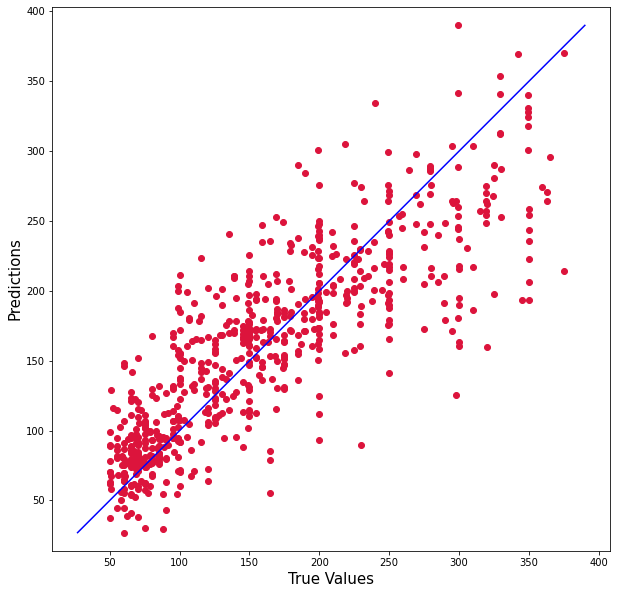

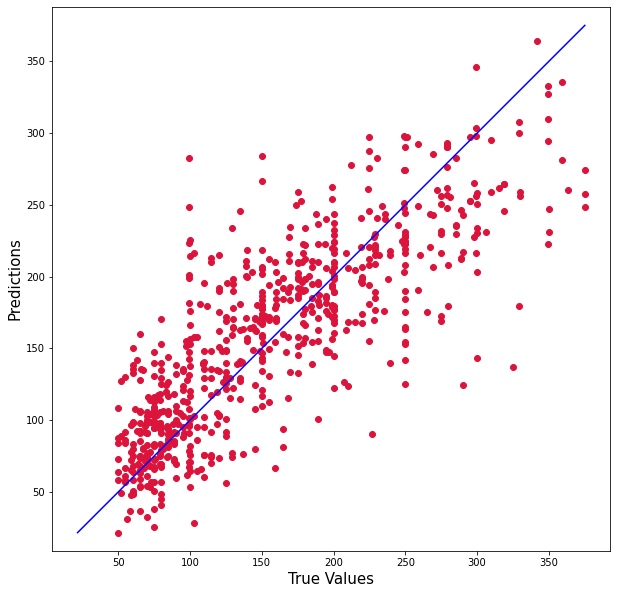

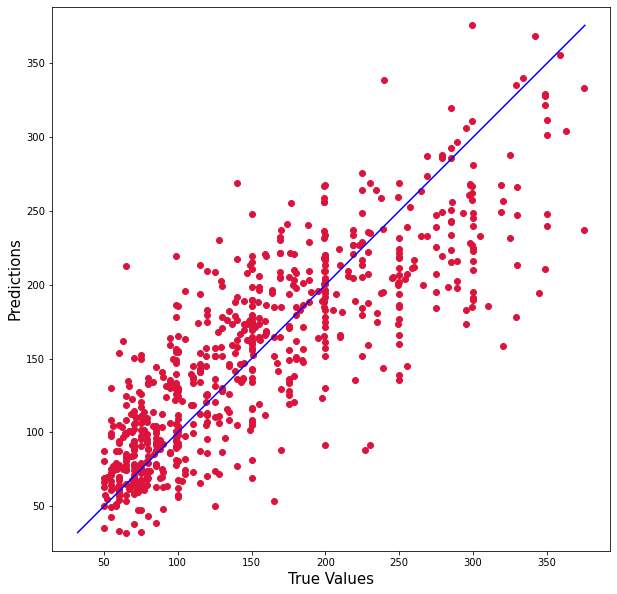

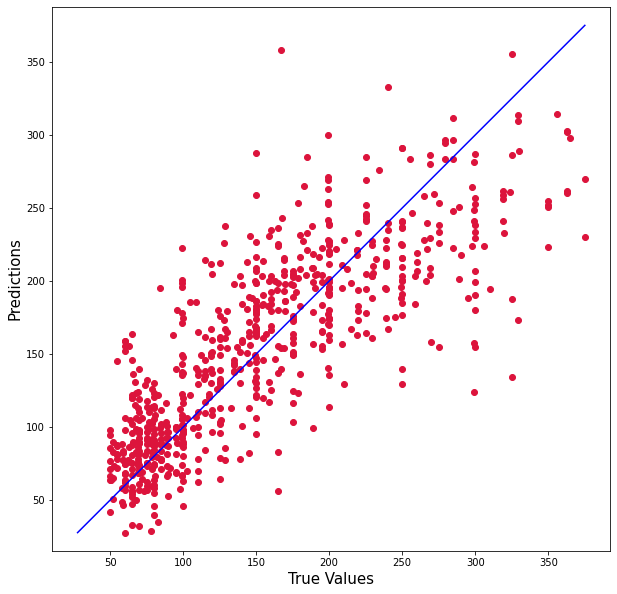

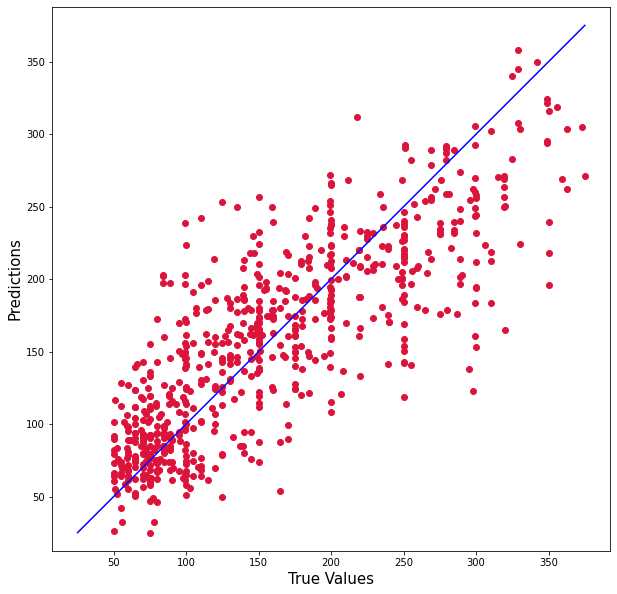

Average R2 score was 0.6753895168982097 average diff in percentage is 17500.72461092501


In [89]:
avg_r2_score,avg_diff = linear_reg_training(X,y,random_seed=42,n_splits=5)
print("Average R2 score was "+str(avg_r2_score)+" average diff in percentage is "+str(avg_diff))

In [92]:
def ridge_reg_training(X,y,alphas,random_seed,n_splits):
  np.random.seed(random_seed)
  random_ints =  np.random.randint(low=0,high=100,size=n_splits)
  avg_acc_scores = []
  avg_rss = []
  avg_diff = []
  avg_r2_scores = []
  for alpha in alphas:
    total_acc_score = 0
    total_r2_score = 0
    rss = 0
    diff = 0
    for rand_int in random_ints:
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rand_int)
      clf = Ridge(alpha=alpha).fit(X_train,y_train)
      #clf = LogisticRegression(random_state=random_seed, C=C, max_iter=200,penalty=penality,solver=solver).fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      #replace the predicted negative value with the minimum value in y_train
      neg_values = np.where(y_pred<=0)
      y_pred[neg_values] = np.min(y_train)
      abs_diff = np.abs(y_pred-y_test)
      diff += sum((abs_diff/y_test)*100)
      rss += sum((y_pred-y_test)**2)
      total_acc_score += clf.score(X_test, y_test)
      total_r2_score += r2_score(y_test, y_pred)
    avg_acc_score = total_acc_score/n_splits
    avg_r2_scores.append(total_r2_score/n_splits)
    avg_acc_scores.append(avg_acc_score)
    avg_rss.append(rss/n_splits)
    avg_diff.append(diff/n_splits)
    #data = {'y_pred':y_pred, 'y_true': y_test, 'diff': abs_diff , 'percentage': (abs_diff/y_test)*100}
    #data_df = pd.DataFrame(data)
    #print(data_df.head())
  return avg_r2_scores,avg_rss,avg_diff


In [98]:
def plot_r2_vs_alphas(avg_r2_scores,alphas):
  plt.figure()
  plt.plot(alphas,avg_r2_scores,'b.-')
  plt.xlabel("Alpha Values")
  plt.ylabel("Average R2 Scores")
  

3232
2314


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.00061e-20): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.00042e-19): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.81921e-18): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.06246e-17): result may not be accurate.
  overwrite_a=True).T


[0.7065700934891783, 0.7065748836478345, 0.7069726376801122, 0.7065244941759927, 0.6954027956506945, 0.6492094285392745, 0.5366206072722035, 0.3812885033337]
[1347177.0699910978, 1347155.077713689, 1345328.9342297048, 1347386.4227113475, 1398447.6707306718, 1610527.774283069, 2127438.5423500263, 2840589.60165321]
[16227.527828661352, 16227.448184310815, 16219.667403714324, 16248.532834302488, 16578.295630569875, 18350.86871557493, 23477.386045364114, 29841.453037125448]
2


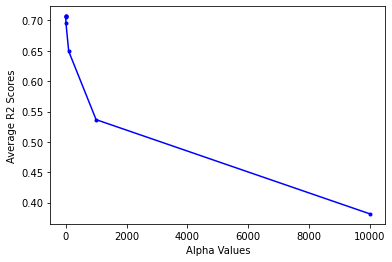

In [101]:
print(len(all_data))

print(len(all_data_no_na))

alphas = [0.0001 ,0.001, 0.1, 1, 10, 100, 1000, 10000]
random_seed = 42
n_splits = 1
avg_r2_scores, avg_rss, avg_diff = ridge_reg_training(X,y,alphas,random_seed,n_splits)
print(avg_r2_scores)
print(avg_rss)
print(avg_diff)
plot_r2_vs_alphas(avg_r2_scores,alphas)
max_index = np.argmax(avg_r2_scores)
print(max_index)
#plot_r2_vs_alphas(avg_rss,alphas)
#plot_r2_vs_alphas(avg_diff,alphas)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=9.89584e-18): result may not be accurate.
  overwrite_a=True).T


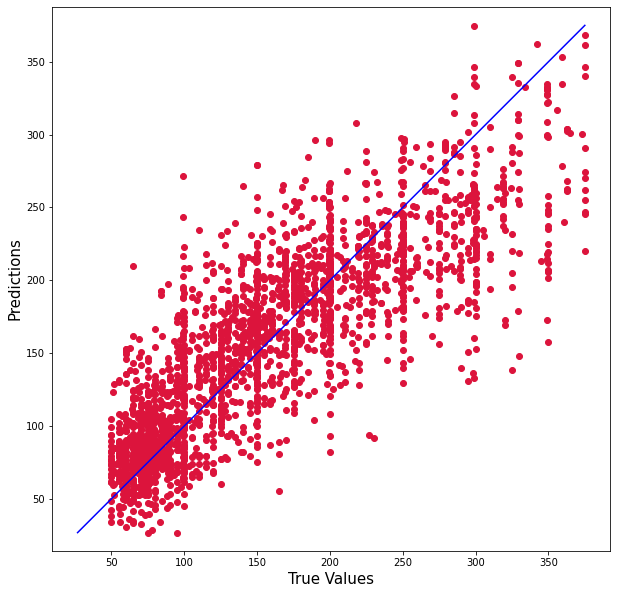

       y_pred  y_true       diff  percentage
1   60.710203    65.0   4.289797    6.599688
2   55.280653    65.0   9.719347   14.952842
3  138.627901    75.0  63.627901   84.837202
4   68.388508    79.0  10.611492   13.432268
5   68.910162    75.0   6.089838    8.119784
24.144678786142244
0.6906331966956245


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X
y_train = y
X_test = X
y_test = y
clf = Ridge(alpha=alphas[max_index]).fit(X_train,y_train)
#clf = LogisticRegression(random_state=random_seed, C=C, max_iter=200,penalty=penality,solver=solver).fit(X_train, y_train)
y_pred = clf.predict(X_test)
neg_values = np.where(y_pred<=0)
y_pred[neg_values] = np.min(y_train)
scatter_plot_true_vs_pred(y_pred,y_test)
abs_diff = np.abs(y_pred-y_test)
data = {'y_pred':y_pred, 'y_true': y_test, 'diff': abs_diff , 'percentage': (abs_diff/y_test)*100}
data_df = pd.DataFrame(data)
print(data_df.head())
print(sum(data_df['percentage'])/len(y_test))
print(r2_score(y_test,y_pred))